1 pixels failed to generate
12 pixels have been generated


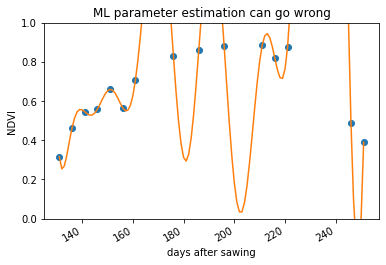

[4.64207786e-02 3.90342957e+01 2.32330254e-20]


In [83]:
import os
import sys
import numpy as np
import importlib
import matplotlib.pyplot as plt

while "methods" in os.getcwd():
    os.chdir("..")
sys.path.append(os.getcwd())
import my_utils.pixel as pixel
import my_utils.data_handle as data_handle
import my_utils.cv as cv

importlib.reload(data_handle)  # get changes in my_utils.pixel
importlib.reload(pixel)  # get changes in my_utils.pixel
importlib.reload(cv)  # get changes in my_utils.pixel

np.random.seed(123)
pixels = data_handle.get_pixels(0.0008)

pix = pixels[11]
pix.plot_ndvi("o")
obj, ok = pix.get_ordinary_kriging(ok_args={"variogram_model": "gaussian"})
# [psill, range, nugget]
pix.plot_step_interpolate("OK")
plt.title("ML parameter estimation can go wrong")
plt.show()
print(ok.variogram_model_parameters)
# too small nugget

Now estimate reasonable parameters, which we will use later

13 pixels failed to generate
149 pixels have been generated

Median parameter:
 [6.30550363e-02 5.54175054e+01 2.98934683e-03]
1 pixels failed to generate
12 pixels have been generated


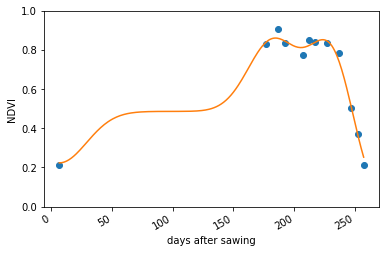

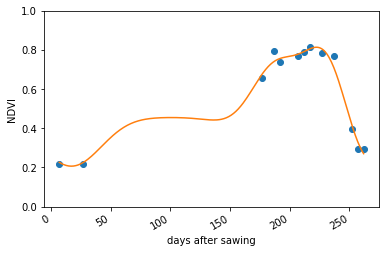

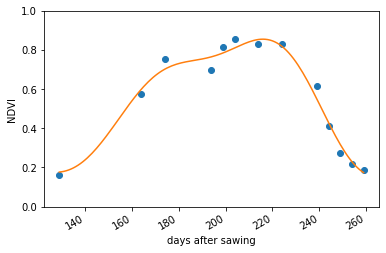

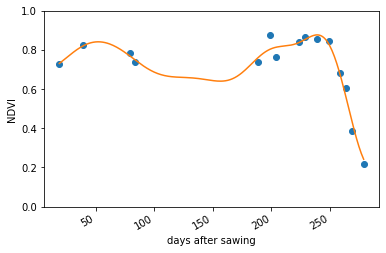

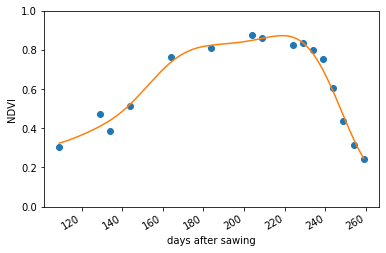

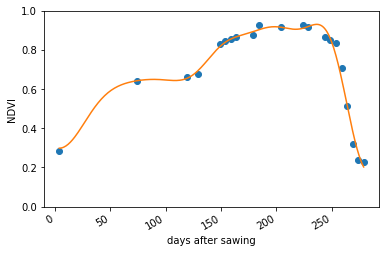

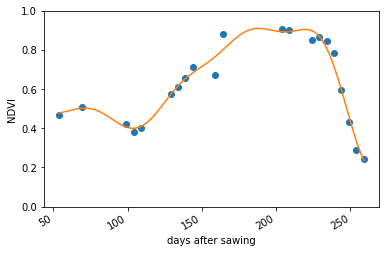

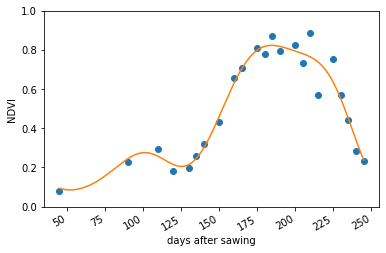

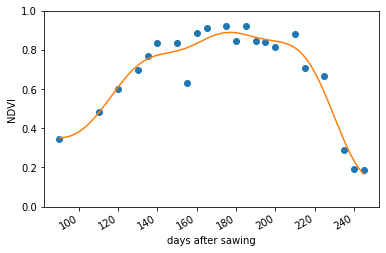

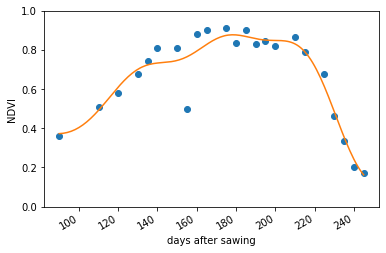

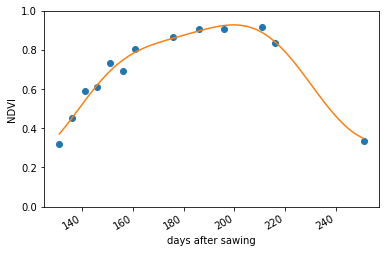

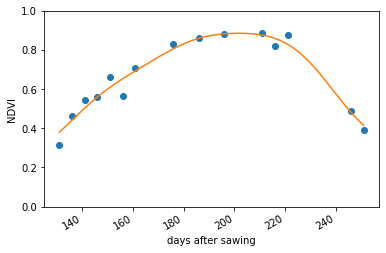

[0.06006568951459981, 55.41750543918869, 0.002989346827017402]


In [69]:
# generate 'median of parameters'
pixels2 = data_handle.get_pixels(0.01)
param_list = []
for pix in pixels2:
    obj, ok = pix.get_ordinary_kriging(ok_args={"variogram_model": "gaussian"})
    # # [psill, range, nugget]
    param_list.append(ok.variogram_model_parameters)
A = np.array(param_list)
parameter = np.median(A, axis=0)
print(f"\nMedian parameter:\n {parameter}")

# plot examples with 'median of parameters'
np.random.seed(123)
pixels = data_handle.get_pixels(0.0008)
for pix in pixels:
    pix.plot_ndvi("o")
    obj, ok = pix.get_ordinary_kriging(
        ok_args={"variogram_model": "gaussian", "variogram_parameters": list(parameter)})
    # [psill, range, nugget]
    pix.plot_step_interpolate("OK")
    plt.show()
print(ok.variogram_model_parameters)

1 pixels failed to generate
12 pixels have been generated


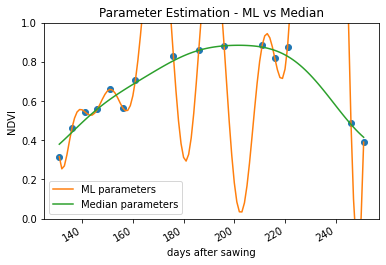

In [85]:
np.random.seed(123)
pixels = data_handle.get_pixels(0.0008)
pix = pixels[11]
pix.plot_ndvi("o")
# plot with 'ML optimized parameters'
name_ml = "ML parameters"
obj, ok = pix.get_ordinary_kriging(name=name_ml,
    ok_args={"variogram_model": "gaussian"}) # [psill, range, nugget]
pix.plot_step_interpolate(name_ml, label=name_ml)
# plot with 'median parameters'
name_med = "Median parameters"
obj, ok = pix.get_ordinary_kriging(name=name_med,
    ok_args={"variogram_model": "gaussian", "variogram_parameters": list(parameter)}) # [psill, range, nugget]
pix.plot_step_interpolate(name_med, label=name_med)
plt.legend()
plt.title("Parameter Estimation - ML vs Median")
plt.show()


Interpolation with kriging

add nugget (assume noisy observations)

There already exists an collumn named: OK_3_10_0
There already exists an collumn named: OK_3_10_1
There already exists an collumn named: OK_3_55_1


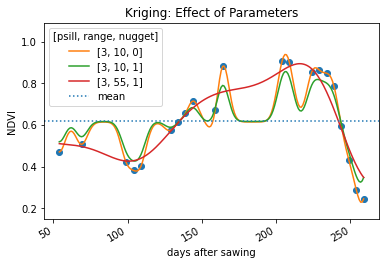

In [91]:
def plot_kriging_param(pix, psill_range_nugget, **plot_args):
    psill, range_, nugget = psill_range_nugget
    name = "OK_"+str(psill)+"_"+str(range_)+"_"+str(nugget)
    pix.get_ordinary_kriging(name=name, ok_args={"variogram_model": "gaussian", "variogram_parameters": [
                             psill, range_, nugget]})  # [psill, range, nugget]
    pix.plot_step_interpolate(name, **plot_args)


pix = pixels[6]
pix.plot_ndvi("o", ylim=[0.15,1.09])
par1 = [3, 10, 0]
plot_kriging_param(pix, par1, label=str(par1))
par2 = [3, 10, 1]
plot_kriging_param(pix, par2, label=str(par2))
par3 = [3, 55, 1]
plot_kriging_param(pix, par3, label=str(par3))
plt.axhline(np.mean(pix.ndvi), label="mean", ls=":")
plt.title("Kriging: Effect of Parameters")

plt.legend(title="[psill, range, nugget]")


==> observe regression the the mean

increase range (more points influence estimation - more smooth - less "regression to the mean")

Text(0, 0.5, 'variance')

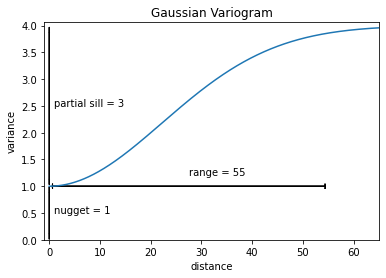

In [189]:
# VARIOGRAM
def my_arrow(x,y,dx,dy):
    p = 0.01
    plt.arrow(x+p*dx, y+p*dy, (1-2*p)*dx, (1-2*p) *
              dy, head_width=0.1, head_length=0.1, length_includes_head=True)
    plt.arrow(x+p*dx + (1-2*p)*dx, y+p*dy + (1-2*p) *
              dy, -(1-2*p)*dx, -(1-2*p) *
              dy, head_width=0.1, head_length=0.1, length_includes_head=True)

p,r,n = [3,55,1]
xx = np.linspace(0,70, 1000)
y = [p*(1-np.exp(-x**2/(4/7*r)**2)) +n for x in xx]
plt.plot(xx,y)
plt.ylim([0,p+n])
plt.annotate(f"nugget = {n}", [1, n/2])
my_arrow(0,0,0,n)
plt.annotate(f"partial sill = {p}", [1, n+p/2])
my_arrow(0,n,0,p)
plt.annotate(f"range = {r}", [r/2, n*1.2])
my_arrow(0, n, r, 0)
plt.xlim([-1,65])
plt.ylim([0,4.06])
plt.title("Gaussian Variogram")
plt.xlabel("distance")
plt.ylabel("variance")